In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = sns.load_dataset("titanic")
df.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [2]:
df.shape


(891, 15)

In [3]:
df.info()


<class 'pandas.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    str     
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    str     
 8   class        891 non-null    category
 9   who          891 non-null    str     
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    str     
 13  alive        891 non-null    str     
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), str(5)
memory usage: 80.7 KB


In [4]:
df.describe()


,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df.isnull().sum()


survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [10]:
df['age'] = df['age'].fillna(df['age'].median())


In [11]:
df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])


In [14]:
df.drop('deck', axis=1, inplace=True, errors='ignore')


In [15]:
df.isnull().sum()


survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    2
alive          0
alone          0
dtype: int64

In [16]:
df['embark_town'] = df['embark_town'].fillna(df['embark_town'].mode()[0])


In [17]:
df.isnull().sum()


survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

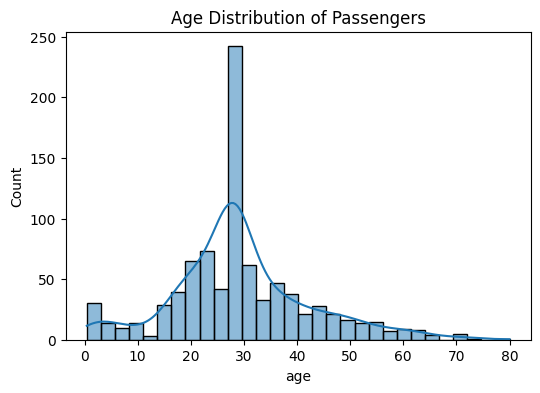

In [18]:
plt.figure(figsize=(6,4))
sns.histplot(df['age'], bins=30, kde=True)
plt.title("Age Distribution of Passengers")
plt.show()


Observation:
Most passengers are between 20–40 years of age.
The age distribution is slightly right-skewed with fewer elderly passengers.


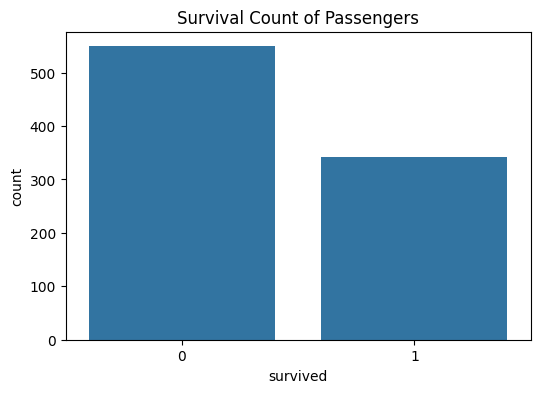

In [19]:
plt.figure(figsize=(6,4))
sns.countplot(x='survived', data=df)
plt.title("Survival Count of Passengers")
plt.show()


Observation:
The number of passengers who did not survive is greater than those who survived.
This indicates that the survival rate in the Titanic disaster was relatively low.


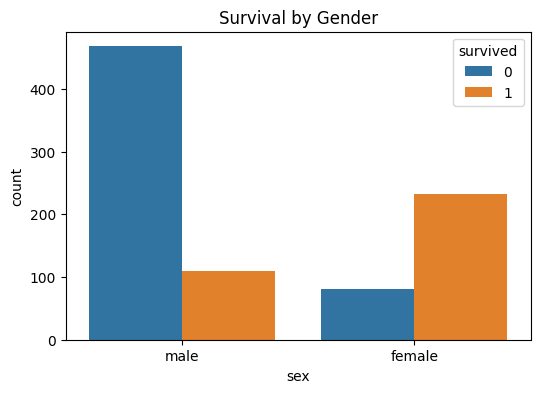

In [20]:
plt.figure(figsize=(6,4))
sns.countplot(x='sex', hue='survived', data=df)
plt.title("Survival by Gender")
plt.show()


Observation:
Female passengers had a significantly higher survival rate compared to male passengers.
This suggests that gender played an important role in survival during the disaster.


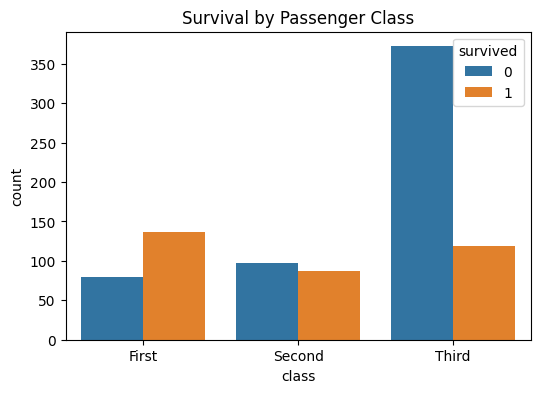

In [21]:
plt.figure(figsize=(6,4))
sns.countplot(x='class', hue='survived', data=df)
plt.title("Survival by Passenger Class")
plt.show()


Observation:
Passengers travelling in First Class had a higher survival rate compared to those in Second and Third Class.
Most of the Third Class passengers did not survive.
This indicates that passenger class had a strong impact on survival.


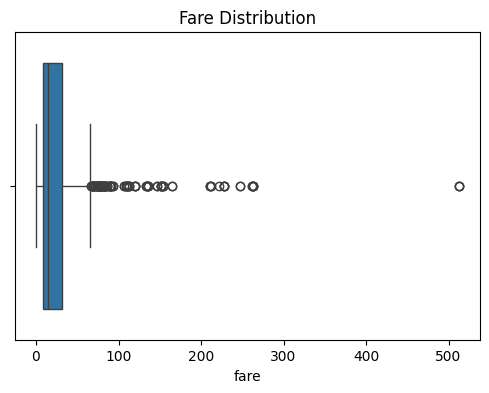

In [22]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df['fare'])
plt.title("Fare Distribution")
plt.show()


Observation:
The fare distribution is highly skewed with several outliers.
Some passengers paid significantly higher fares compared to others.


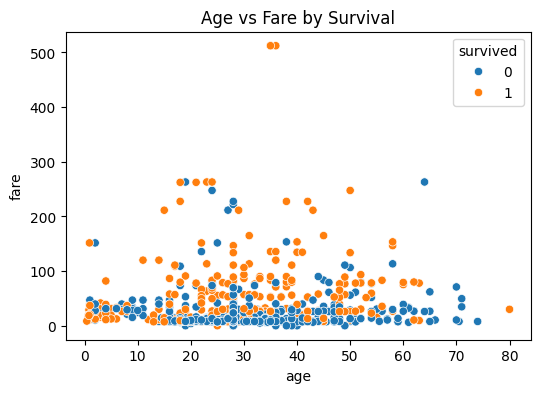

In [23]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='age', y='fare', hue='survived', data=df)
plt.title("Age vs Fare by Survival")
plt.show()


Observation:
Passengers who paid higher fares had a better chance of survival.
There is no strong relationship between age and fare.
Survivors are more concentrated among passengers who paid higher fares.


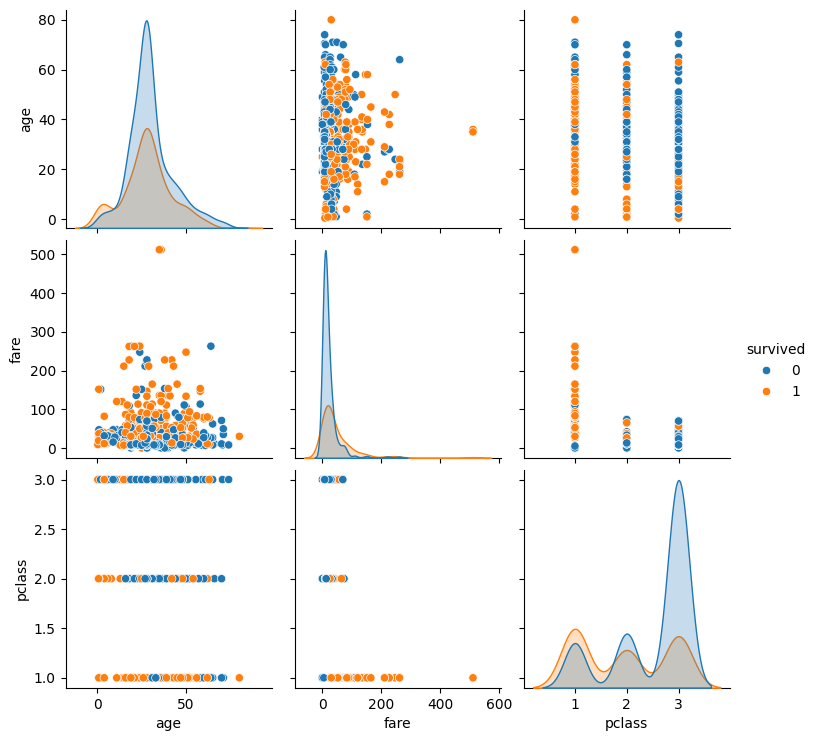

In [25]:
sns.pairplot(df[['age','fare','pclass','survived']], hue='survived')
plt.show()


Observation:
Fare and passenger class show some correlation with survival.
Higher fare and lower passenger class number (First Class) are associated with better survival chances.
Age does not show a strong impact on survival.


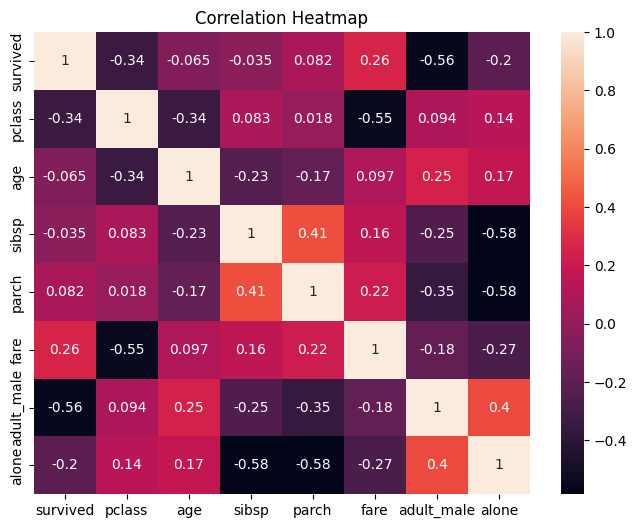

In [27]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.title("Correlation Heatmap")
plt.show()


Observation:
Fare shows a positive correlation with survival.
Passenger class is negatively correlated with survival.
Age has a weak correlation with survival.
Higher fare-paying passengers had a better chance of survival.


Key Findings:

1. Female passengers had a higher survival rate compared to male passengers.
2. First Class passengers were more likely to survive than Second and Third Class passengers.
3. Passengers who paid higher fares had better survival chances.
4. Age did not have a strong impact on survival.
5. Most passengers were between 20–40 years of age.
6. Fare distribution contains several outliers.
